# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response=requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kulachi
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | kharan
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | brookings
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | rio preto da eva
Processing Record 10 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 11 of Set 1 | yigo village
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | edd
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | colonia
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | sov

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kulachi,31.9286,70.4592,103.21,27,6,20.85,PK,1692033918
1,puerto natales,-51.7236,-72.4875,36.34,93,98,4.21,CL,1692033918
2,kharan,28.5833,65.4167,92.39,9,51,6.13,PK,1692033918
3,puerto ayora,-0.7393,-90.3518,80.56,87,79,7.00,EC,1692033918
4,brookings,44.3114,-96.7984,70.05,69,20,18.41,US,1692033639


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_Data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("Output_Data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kulachi,31.9286,70.4592,103.21,27,6,20.85,PK,1692033918
1,puerto natales,-51.7236,-72.4875,36.34,93,98,4.21,CL,1692033918
2,kharan,28.5833,65.4167,92.39,9,51,6.13,PK,1692033918
3,puerto ayora,-0.7393,-90.3518,80.56,87,79,7.00,EC,1692033918
4,brookings,44.3114,-96.7984,70.05,69,20,18.41,US,1692033639


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

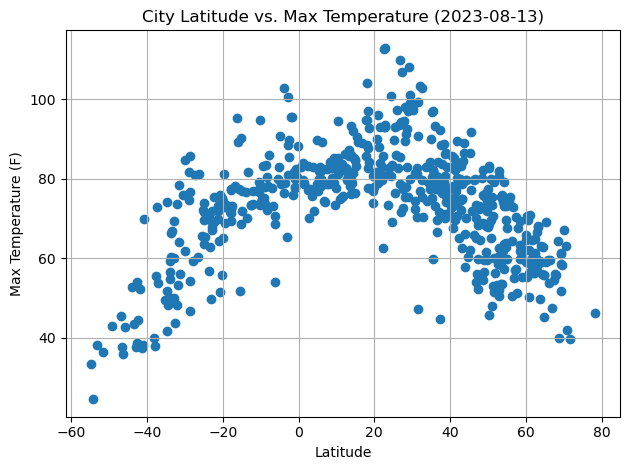

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-08-13)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.tight_layout()
# Save the figure
plt.savefig("Output_Data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

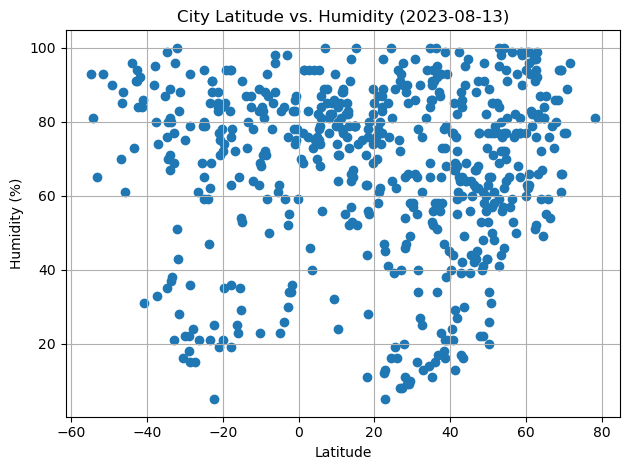

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-08-13)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

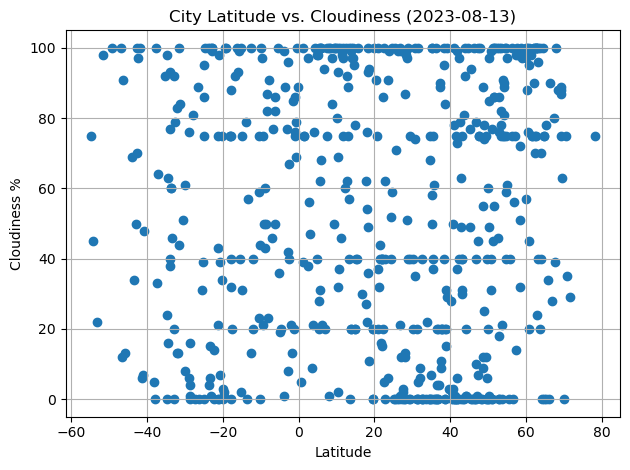

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-08-13)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

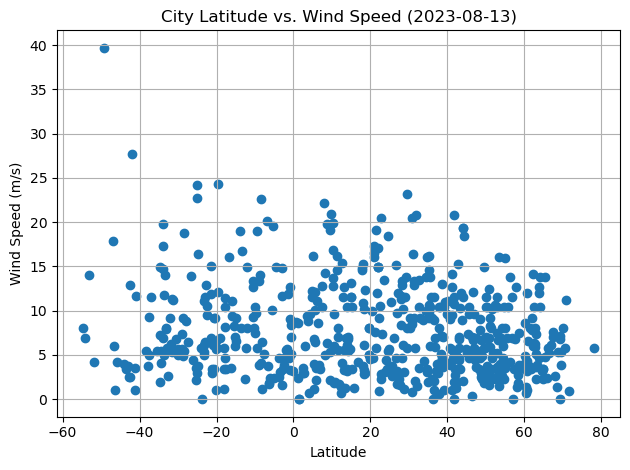

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-08-13)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_values, y_values)

    plt.grid()

    plt.plot(x_values, regress_values, "r-")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
   
    

    # Show plot
    plt.show()


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kulachi,31.9286,70.4592,103.21,27,6,20.85,PK,1692033918
2,kharan,28.5833,65.4167,92.39,9,51,6.13,PK,1692033918
4,brookings,44.3114,-96.7984,70.05,69,20,18.41,US,1692033639
5,stanley,54.8680,-1.6985,63.72,94,100,8.05,GB,1692033919
9,yigo village,13.5361,144.8886,78.12,91,0,6.91,GU,1692033919


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,36.34,93,98,4.21,CL,1692033918
3,puerto ayora,-0.7393,-90.3518,80.56,87,79,7.00,EC,1692033918
6,luderitz,-26.6481,15.1594,60.33,61,89,13.96,NaN,1692033919
7,blackmans bay,-43.0167,147.3167,37.53,91,50,3.76,AU,1692033919
8,rio preto da eva,-2.6994,-59.6997,100.51,30,8,3.40,BR,1692033919


###  Temperature vs. Latitude Linear Regression Plot

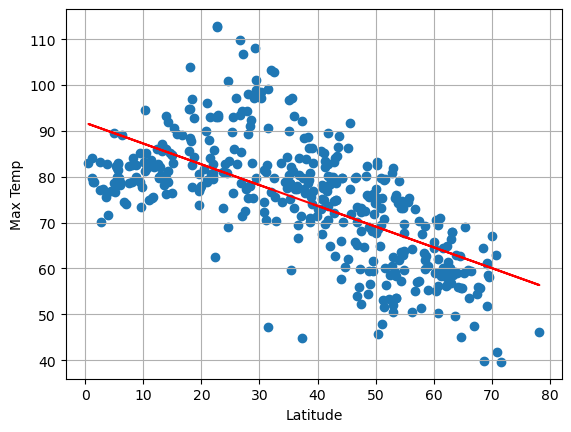

r= -0.65


In [21]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Northern Hemisphere: Latitude Vs Max Temp", "Northern")
n_correlation= northern_hemi_df["Lat"].corr(northern_hemi_df["Max Temp"])
print(f'r= {n_correlation:.2f}')


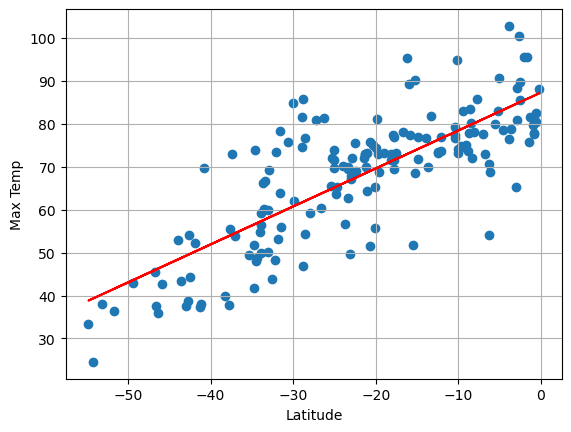

r= 0.79


In [22]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Southern Hemisphere: Latitude Vs Max Temp", "Southern")
s_correlation= southern_hemi_df["Lat"].corr(southern_hemi_df["Max Temp"])
print(f'r= {s_correlation:.2f}')

**Discussion about the linear relationship:** : Temperature Vs Latitude: In the Northern Hemisphere, there is a correlation of -.0.65. This indicates to us that there is moderately strong negative relationship between the temperature and latitude. For the Northern Hemisphere graph, as the latitude increases, the temperature decreases. For the Southern Hemisphere, there is a correlation of 0.79, which indicates a strong positive linear correlation. As you can see on the graph, as the latitude increases, the max temperature also increases. 

### Humidity vs. Latitude Linear Regression Plot

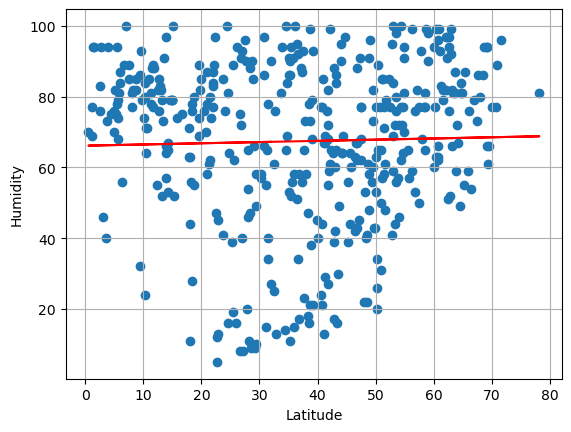

r= 0.03


In [29]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Northern Hemisphere: Latitude Vs Humidity", "Northern")
n_correlation1= northern_hemi_df["Lat"].corr(northern_hemi_df["Humidity"])
print(f'r= {n_correlation1:.2f}')


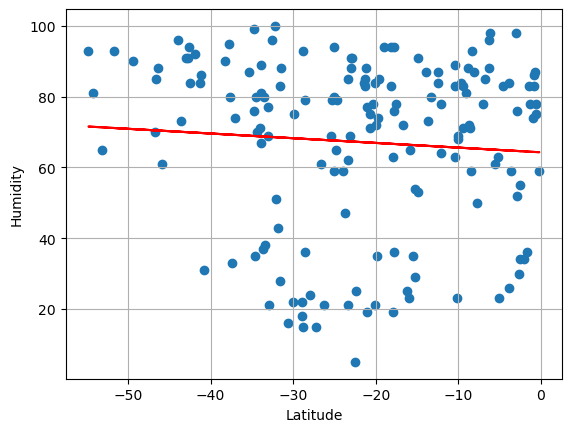

r= -0.07


In [30]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Southern Hemisphere: Latitude Vs Humidity", "Southern")
s_correlation1= southern_hemi_df["Lat"].corr(southern_hemi_df["Humidity"])

print(f'r= {s_correlation1:.2f}')

**Discussion about the linear relationship:** Humidity Vs Latitude: In the Northern Hemisphere, there is a correlation of -.03. This indicates to us that there is weak negative relationship between humidity and latitude. For the Northern Hemisphere graph, as the latitude increases, the humidity stays relatively the same. For the Southern Hemisphere, there is a correlation of -.07, which indicates another weak negative relationship between the two factors. As you can see on the graph, as the latitude decreases slightly (not a lot), the max humidity decreases but stays relatively the same. 

### Cloudiness vs. Latitude Linear Regression Plot

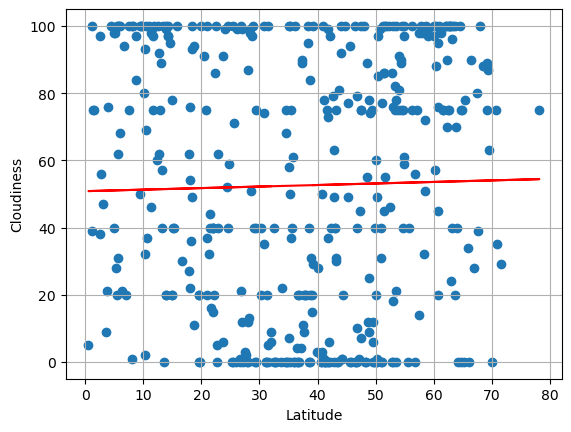

r= 0.02


In [25]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Northern Hemisphere: Latitude Vs Cloudiness", "Northern")
n_correlation2= northern_hemi_df["Lat"].corr(northern_hemi_df["Cloudiness"])

print(f'r= {n_correlation2:.2f}')

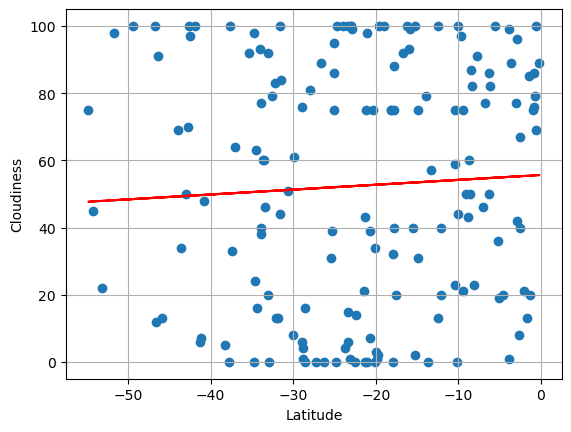

r= 0.05


In [26]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Southern Hemisphere: Latitude Vs Cloudiness", "Southern")
s_correlation2= southern_hemi_df["Lat"].corr(southern_hemi_df["Cloudiness"])

print(f'r= {s_correlation2:.2f}')

**Discussion about the linear relationship:** Cloudiness Vs Latitude: In the Northern Hemisphere, there is a correlation of 0.02 This indicates to us that there is weak positive relationship between cloudiness and latitude. For the Northern Hemisphere graph, the latitude slightly increases, the cloudiness inceases but stays relatively the same. For the Southern Hemisphere, there is a correlation of 0.05, which indicates another weak positive relationship between the two factors. As you can see on the graph, as the latitude decreases slightly (not a lot), the cloudiness increases as well but stays relatively the same. 

### Wind Speed vs. Latitude Linear Regression Plot

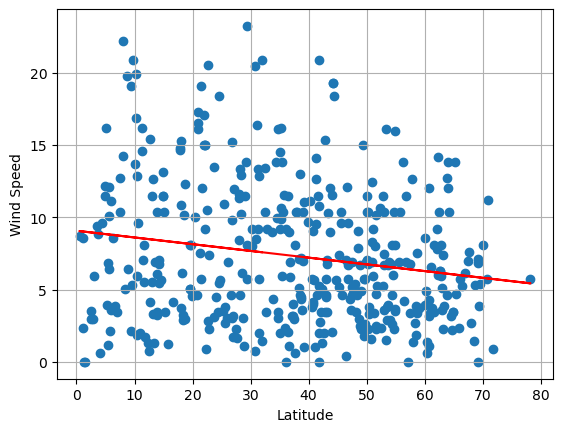

r= -0.18


In [27]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Wind Speed vs. Latitude", "Northern")
n_correlation3= northern_hemi_df["Lat"].corr(northern_hemi_df["Wind Speed"])

print(f'r= {n_correlation3:.2f}')

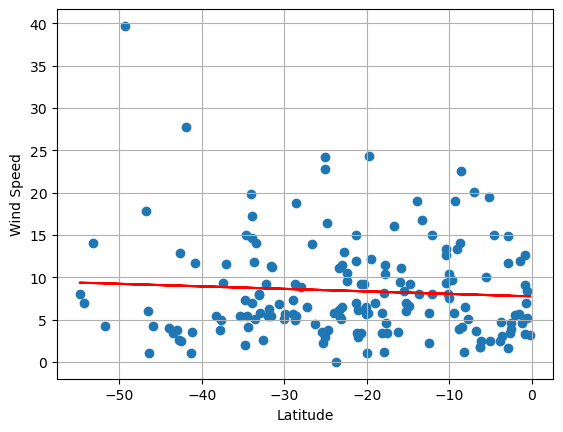

r= -0.07


In [28]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Southern Hemisphere: Latitude Vs Wind Speed", "Southern")
s_correlation3= southern_hemi_df["Lat"].corr(southern_hemi_df["Wind Speed"])

print(f'r= {s_correlation3:.2f}')

**Discussion about the linear relationship:** Wind Speed Vs Latitude: In the Northern Hemisphere, there is a correlation of -.18 This indicates to us that there is weak negative relationship between wind speef and latitude. As the latitude slightly increases, the wind speed decreases. For the Southern Hemisphere, there is a correlation of -0.07, which indicates another weak negative relationship between the two factors. As you can see on the graph, as the latitude decreases but stays relatively the same and the wind speed decreases as well but stays relatively the same. 